<a href="https://colab.research.google.com/github/IbukunGracey/PyTorch-Basics/blob/main/04_Neural_Network_with_PyTorch_Exercise_solution.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Multi Classification Exercise using Penguin Dataset


We will be using the Penguin dataset from kaggle https://www.kaggle.com/datasets/larsen0966/penguins to build a simple neural network model that can classify different species of penguins.



Download the Dataset from the Kaggle link above or use the one attached to this notebook on the learning platform.

Data Description:

Data were collected and made available by Dr. Kristen Gorman and the Palmer Station, Antarctica LTER, a member of the Long Term Ecological Research Network..

The columns in this dataset are:

- species - A factor denoting penguin species (Adélie, Chinstrap and Gentoo)
- island - A factor denoting island in Palmer Archipelago, Antarctica (Biscoe, Dream or Torgersen)
- bill_length_mm - A number denoting bill length (millimeters)
- bill_depth_mm - A number denoting bill depth (millimeters)
- flipper_length_mm - An integer denoting flipper length (millimeters)
- body_mass_g - An integer denoting body mass (grams)
- sex:
- year: A number denoting the year data was collected.

Steps:

1. Load your data/ Do some data preparation
2. Create a neural network model
3. Turn on the model/ Instantiate the model
4. Split the data
5. Train your model
6. Validate the model using the test data
7. Fine tune your model
8. Make Predictions
9. Save your model


In [2]:
# Install torchview for visualizing our model
!pip install torchinfo

In [4]:
### IMPORT STATEMENTS
import torch                  # import the torch module
import torch.nn as nn         # import the neural hetwork library in pytorch
import torch.nn.functional as F  # this helps to move data forward in our function
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import numpy as np

import seaborn as sns
from torchinfo import summary   # a visual to draw our network graph

###1.  Load Data and do some data preparations

Q1: Read in the pengins.csv file and print out the first five records.




In [6]:
#load the data
data = '/content/penguins.csv'
df = pd.read_csv(data, index_col=[0])
df.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
1,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
2,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
3,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
4,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,2007
5,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 344 entries, 1 to 344
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   bill_length_mm     342 non-null    float64
 3   bill_depth_mm      342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                333 non-null    object 
 7   year               344 non-null    int64  
dtypes: float64(4), int64(1), object(3)
memory usage: 24.2+ KB


### Dealing with missing values

Check for missing values in the data set. There are 5 columns and 11 rows with missing values We can drop the 11 rows because the number is small.

In [8]:
#check for the columns with missing values
df.isnull().sum()

,0
species,0
island,0
bill_length_mm,2
bill_depth_mm,2
flipper_length_mm,2
body_mass_g,2
sex,11
year,0


In [9]:
#check for the rows with missing values
df[df.isnull().any(axis=1)]

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
4,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,2007
9,Adelie,Torgersen,34.1,18.1,193.0,3475.0,NaN,2007
10,Adelie,Torgersen,42.0,20.2,190.0,4250.0,NaN,2007
11,Adelie,Torgersen,37.8,17.1,186.0,3300.0,NaN,2007
12,Adelie,Torgersen,37.8,17.3,180.0,3700.0,NaN,2007
48,Adelie,Dream,37.5,18.9,179.0,2975.0,NaN,2007
179,Gentoo,Biscoe,44.5,14.3,216.0,4100.0,NaN,2007
219,Gentoo,Biscoe,46.2,14.4,214.0,4650.0,NaN,2008
257,Gentoo,Biscoe,47.3,13.8,216.0,4725.0,NaN,2009
269,Gentoo,Biscoe,44.5,15.7,217.0,4875.0,NaN,2009


Q3: Drop all the missing values in the dataset using the `dropna` function, don't forget to include the inplace arguement and print the shape

In [10]:
#drop the missing values
df.dropna(inplace= True)
df.shape

(333, 8)

#### Let us check the distribution of the target label "species"

In [11]:
df.species.value_counts()

,count
species,
Adelie,146
Gentoo,119
Chinstrap,68


<Axes: xlabel='species'>

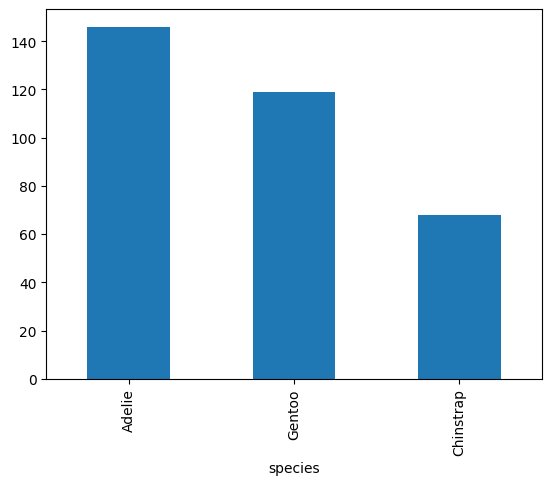

In [12]:
#Let us visualize it
df.species.value_counts().plot(kind='bar')

Q4: The target column "species" is in text format, Convert it to integers using the .map function with this dictionary as input arguments,
{'Adelie':0.0, 'Gentoo':1.0, 'Chinstrap':2.0}

In [13]:
#Data manipulation
#change last column to integers
df['species'] = df['species'].map( {'Adelie':0.0, 'Gentoo':1.0, 'Chinstrap':2.0})
df.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
1,0.0,Torgersen,39.1,18.7,181.0,3750.0,male,2007
2,0.0,Torgersen,39.5,17.4,186.0,3800.0,female,2007
3,0.0,Torgersen,40.3,18.0,195.0,3250.0,female,2007
5,0.0,Torgersen,36.7,19.3,193.0,3450.0,female,2007
6,0.0,Torgersen,39.3,20.6,190.0,3650.0,male,2007


#### Next, Let's select the features and target that will be used to build our neural network model

Q5: Select`bill_length_mm`, `bill_depth_mm`, `flipper_length_mm`, `body_mass_g` as features `x`, and `species` as target `y`

In [14]:
# Define the features and label
x = df.drop(['species', 'island', 'sex', 'year'] , axis =1)
y = df['species']


Q6: Print the first 5 rows in x

In [15]:
x.tail()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
340,55.8,19.8,207.0,4000.0
341,43.5,18.1,202.0,3400.0
342,49.6,18.2,193.0,3775.0
343,50.8,19.0,210.0,4100.0
344,50.2,18.7,198.0,3775.0


In [16]:
# Print the first 5 rows in y
y.head()

,species
1,0.0
2,0.0
3,0.0
5,0.0
6,0.0


In [17]:
#convert these to X and y to numpy arrays
x= x.values
y= y.values
x

array([[  39.1,   18.7,  181. , 3750. ],
       [  39.5,   17.4,  186. , 3800. ],
       [  40.3,   18. ,  195. , 3250. ],
       ...,
       [  49.6,   18.2,  193. , 3775. ],
       [  50.8,   19. ,  210. , 4100. ],
       [  50.2,   18.7,  198. , 3775. ]])

### 2. Create the neural network model
Q7: Using a Model Class that inherits the neural newtork. Complete the code below to include:
1. Input features = 4,
2. Hidden layer 1 = 8
3. Hidden layer 2 = 6
4. Hidden layer 3 = 4
5. Output layer = 3

In [18]:
class PenguinModel(nn.Module):
  # Define the Input layers (4 features for the penguins) -->
  # Hidden layer 1 with n neurons -->
  # Hidden layer 2 with m neurons -->
  # Hidden layer 3 with p neurons -->
  # output with 3 classes of penguins

  #initialize the model Self
  def __init__(self, input_features=4, h1=8, h2=6, h3=4, output_features=3):
    super().__init__()  #instantiate our nn.Module

    #define the layers
    self.fc1 = nn.Linear(input_features, h1)
    self.fc2 = nn.Linear(h1, h2)
    self.fc3 = nn.Linear(h2,h3)
    self.out = nn.Linear(h3, output_features)

  #Create a forward network function: function to move everything forward
  # Relu- if output less than 0, make it 0, if output more than 0 use the output
  def forward(self, x):
    x = F.relu(self.fc1(x)) #start with layer 1 and apply and activation function
    x = F.relu(self.fc2(x)) #move to layer 2 and apply an activation function
    x = F.relu(self.fc3(x)) #move to layer 3 and apply an activation function
    x = self.out(x)         #move to output layer without an activation function
    return x

Q8: Picks a manual seed for randomization an set at 32

In [19]:
# Pick a manual seed for randomization
torch.manual_seed(32)


Q9: Create an instance of the penguin model with a variable name `model`

In [20]:
# Create an instance of the model - Turn the model ON
model = PenguinModel()

In [25]:
# #Draw model graph
# model_graph = draw_graph(model,input_size=[1,4], device='meta')
summary(PenguinModel(), input_size=(1, 4))

Layer (type:depth-idx)                   Output Shape              Param #
PenguinModel                             [1, 3]                    --
├─Linear: 1-1                            [1, 8]                    40
├─Linear: 1-2                            [1, 6]                    54
├─Linear: 1-3                            [1, 4]                    28
├─Linear: 1-4                            [1, 3]                    15
Total params: 137
Trainable params: 137
Non-trainable params: 0
Total mult-adds (Units.MEGABYTES): 0.00
Input size (MB): 0.00
Forward/backward pass size (MB): 0.00
Params size (MB): 0.00
Estimated Total Size (MB): 0.00

### 3. Split the data to train and test set

In [26]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state=32)


Q10: Convert X-inputs to float tensors using `torch.FloatTensor` and y-inputs to long tensor using `torch.LongTensor`

In [27]:
# Convert X-inputs to float tensors
# x_train = torch.tensor(x_train, dtype=torch.double)
x_train = torch.FloatTensor(x_train)
x_test =torch.FloatTensor(x_test)

#convert y-label to long tensors
# y_train = torch.tensor(y_train, dtype=torch.double)
y_train = torch.LongTensor(y_train)
y_test =torch.LongTensor(y_test)

In [28]:
x_test

tensor([[  37.7000,   16.0000,  183.0000, 3075.0000],
        [  49.6000,   16.0000,  225.0000, 5700.0000],
        [  38.5000,   17.9000,  190.0000, 3325.0000],
        [  39.6000,   17.7000,  186.0000, 3500.0000],
        [  38.8000,   17.2000,  180.0000, 3800.0000],
        [  48.7000,   14.1000,  210.0000, 4450.0000],
        [  35.7000,   16.9000,  185.0000, 3150.0000],
        [  46.7000,   15.3000,  219.0000, 5200.0000],
        [  58.0000,   17.8000,  181.0000, 3700.0000],
        [  42.5000,   17.3000,  187.0000, 3350.0000],
        [  42.4000,   17.3000,  181.0000, 3600.0000],
        [  37.6000,   19.3000,  181.0000, 3300.0000],
        [  46.4000,   15.0000,  216.0000, 4700.0000],
        [  45.8000,   14.2000,  219.0000, 4700.0000],
        [  46.5000,   13.5000,  210.0000, 4550.0000],
        [  51.7000,   20.3000,  194.0000, 3775.0000],
        [  42.6000,   13.7000,  213.0000, 4950.0000],
        [  39.8000,   19.1000,  184.0000, 4650.0000],
        [  45.5000,   15.000

In [29]:
y_train

tensor([0, 0, 0, 1, 1, 2, 0, 0, 1, 0, 0, 0, 2, 1, 0, 2, 1, 1, 2, 0, 1, 0, 1, 1,
        0, 1, 0, 0, 0, 2, 0, 0, 1, 2, 0, 1, 0, 0, 0, 2, 0, 2, 1, 1, 1, 0, 2, 1,
        0, 0, 1, 0, 0, 2, 2, 2, 2, 2, 0, 1, 2, 0, 1, 2, 1, 0, 0, 0, 0, 2, 0, 1,
        2, 0, 0, 0, 1, 0, 1, 0, 1, 0, 2, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 2, 1,
        1, 0, 0, 1, 1, 0, 1, 2, 0, 0, 0, 0, 2, 2, 0, 1, 2, 2, 0, 0, 0, 1, 0, 0,
        2, 1, 1, 1, 1, 0, 0, 0, 2, 2, 0, 2, 0, 0, 2, 2, 2, 0, 0, 2, 1, 0, 0, 0,
        0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 2, 1, 0, 1, 1, 1, 1, 2, 1, 2, 0, 1, 1, 1,
        1, 2, 1, 0, 0, 0, 0, 2, 0, 1, 1, 0, 2, 0, 2, 0, 1, 0, 0, 0, 1, 1, 1, 0,
        1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 2, 0, 2, 0,
        1, 0, 1, 0, 1, 0, 0, 2, 0, 1, 1, 1, 2, 0, 0, 0, 0, 2, 0, 0, 2, 0, 0, 0,
        1, 1, 0, 0, 1, 0, 2, 0, 1])

### 4. Train the model

Q11:
1. Choose a Criterion for the model using the nn.CrossEntropyLoss() and assign it to a variable name `criterion`  

2. Choose an Optimizer for the model using the `torch.optim.Adam` module , with a learning rate of 0.01 and assign it to a variable name `optimizer`  

In [30]:
# Set the criterion of model to measure the error,
# how far off the prediction are from the data

criterion = nn.CrossEntropyLoss()

# Choose an Optimizer (Adam), learning rate
# (if error doesn't go down after a bunch of iterations (epoch), lower our learning rate)
optimizer = torch.optim.Adam(model.parameters(), lr =0.01) #the lower the lr the more the time to train

In [31]:
model

PenguinModel(
  (fc1): Linear(in_features=4, out_features=8, bias=True)
  (fc2): Linear(in_features=8, out_features=6, bias=True)
  (fc3): Linear(in_features=6, out_features=4, bias=True)
  (out): Linear(in_features=4, out_features=3, bias=True)
)

Q12: Train the model with  51 epochs, and output the result every 5 epoch

In [32]:
# Train the model
#Epoch? (if 1, it implies the number of time the model is trained is once)

epoch =51
losses = []   #this list is to store the losses in each epoch

for i in range(epoch):
  # Go forward and get prediction
  y_pred = model.forward(x_train) #get predicted result

  #Measure the loss/error, it will be high at first- How far predictions from data
  loss = criterion(y_pred, y_train) #predicted values vs the y_train

  #Keep track of our losses
  losses.append(loss.detach().numpy())

  #print every 10 epoch
  if i % 5 == 0:
    print(f'Epoch: {i} and loss: {loss}')

  #Do some back propagation: take the error rate of forward propagation and feed it back
  #through the network to fine tune the weight
  optimizer.zero_grad() # reset grads
  loss.backward()
  optimizer.step() # update weights


Epoch: 0 and loss: 13.716621398925781
Epoch: 5 and loss: 4.879710674285889
Epoch: 10 and loss: 1.0964187383651733
Epoch: 15 and loss: 1.0875200033187866
Epoch: 20 and loss: 1.0800989866256714
Epoch: 25 and loss: 1.0737026929855347
Epoch: 30 and loss: 1.0681231021881104
Epoch: 35 and loss: 1.0632505416870117
Epoch: 40 and loss: 1.0590139627456665
Epoch: 45 and loss: 1.0553585290908813
Epoch: 50 and loss: 1.0522329807281494


Text(0.5, 0, 'Epoch')

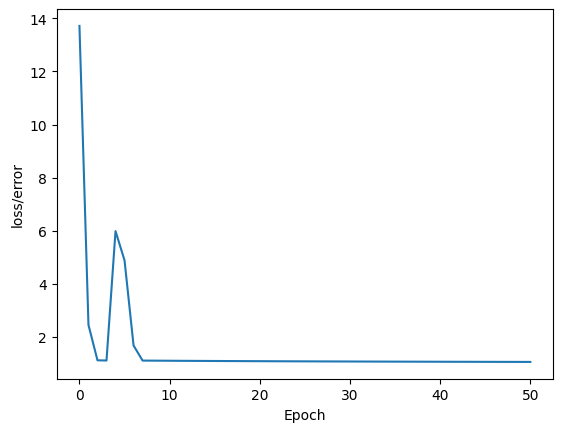

In [33]:
#Visualize the result
plt.plot(range(epoch), losses)
plt.ylabel('loss/error')
plt.xlabel('Epoch')


### Model Validation on Test Data

Q13: Evaluate the model on the test data `x_test` and print the test_loss

In [34]:
#Evaluate Model on Test Data set
with torch.no_grad():   #This turns off back propagation
  #Evaluate the data on the 20% of data
  y_eval = model.forward(x_test) # X_test are features from our test set, y_eval will be
  test_loss = criterion(y_eval, y_test) # Find the test loss or error

In [35]:
test_loss   # the test loss is close to the train loss, we have a great model

tensor(1.0873)

#### Track the individual test data

In [36]:
#check the length of the y test
len(y_test)

84

In [37]:
y_test[0:5]

tensor([0, 1, 0, 0, 0])

In [38]:
x_test[0:5]

tensor([[  37.7000,   16.0000,  183.0000, 3075.0000],
        [  49.6000,   16.0000,  225.0000, 5700.0000],
        [  38.5000,   17.9000,  190.0000, 3325.0000],
        [  39.6000,   17.7000,  186.0000, 3500.0000],
        [  38.8000,   17.2000,  180.0000, 3800.0000]])

In [39]:
#Let's track the total correct data

correct = 0
with torch.no_grad():    #turn off back propagation
  for i, data in enumerate(x_test):
    y_val = model.forward(data)   # pass test data through the model

    #will tell us what type of penguin class our network think it is
    # argmax is a function that finds the index of the maximum value within an array or along a specified axis.
    print(f'{i+1}.) {str(y_val)} \t {y_test[i]} \t {y_val.argmax().item()}')

    # check number of correct labels
    if y_val.argmax().item() == y_test[i]:
      correct +=1
print(f'We got {correct} correct!')

1.) tensor([0.5164, 0.3611, 0.0556]) 	 0 	 0
2.) tensor([0.5164, 0.3611, 0.0556]) 	 1 	 0
3.) tensor([0.5164, 0.3611, 0.0556]) 	 0 	 0
4.) tensor([0.5164, 0.3611, 0.0556]) 	 0 	 0
5.) tensor([0.5164, 0.3611, 0.0556]) 	 0 	 0
6.) tensor([0.5164, 0.3611, 0.0556]) 	 1 	 0
7.) tensor([0.5164, 0.3611, 0.0556]) 	 0 	 0
8.) tensor([0.5164, 0.3611, 0.0556]) 	 1 	 0
9.) tensor([0.5164, 0.3611, 0.0556]) 	 2 	 0
10.) tensor([0.5164, 0.3611, 0.0556]) 	 2 	 0
11.) tensor([0.5164, 0.3611, 0.0556]) 	 2 	 0
12.) tensor([0.5164, 0.3611, 0.0556]) 	 0 	 0
13.) tensor([0.5164, 0.3611, 0.0556]) 	 1 	 0
14.) tensor([0.5164, 0.3611, 0.0556]) 	 1 	 0
15.) tensor([0.5164, 0.3611, 0.0556]) 	 1 	 0
16.) tensor([0.5164, 0.3611, 0.0556]) 	 2 	 0
17.) tensor([0.5164, 0.3611, 0.0556]) 	 1 	 0
18.) tensor([0.5164, 0.3611, 0.0556]) 	 0 	 0
19.) tensor([0.5164, 0.3611, 0.0556]) 	 1 	 0
20.) tensor([0.5164, 0.3611, 0.0556]) 	 1 	 0
21.) tensor([0.5164, 0.3611, 0.0556]) 	 1 	 0
22.) tensor([0.5164, 0.3611, 0.0556]) 	 0 	

### Feed New Data into the Neural Network and Make Prediction

Q14: Given that you have the bill_length_mm =35.0 ,	bill_depth_mm= 19.0,flipper_length_mm=181.0,	body_mass_g=3700.0

What is the specie of penguin?

In [40]:
# Given that you have the Sepal and petal length and sepal and petal width
# What is the specie of flower

new_penguin = torch.tensor([35.0, 19.0, 118.0, 3700.0])
new_penguin

tensor([  35.,   19.,  118., 3700.])

In [41]:
with torch.no_grad():
  print(model(new_penguin))

tensor([0.5164, 0.3611, 0.0556])
